<a href="https://colab.research.google.com/github/Atul-lagad/ipl_dataset_pandas_seaborn_project/blob/main/proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
 from google.colab import files
data=files.upload()

Saving Book_ipl22_ver_33.csv to Book_ipl22_ver_33 (1).csv


In [7]:
ls

'Book_ipl22_ver_33 (1).csv'   Book_ipl22_ver_33.csv   sample_data/


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df=pd.read_csv('Book_ipl22_ver_33.csv')
df.set_index('match_id',inplace=True)
df

,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
match_id,,,,,,,,,,,,,,,,,,,
1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,160,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26
71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,191,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14
72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,193,6,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43


**which team is winner of ipl 22**

In [10]:
df[df['stage']=='Final']['match_winner']

match_id
74    Gujarat
Name: match_winner, dtype: object

**in ipl22 how many teams choose bat first after toss win**

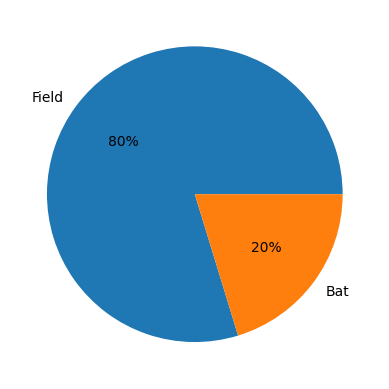

In [11]:
a=df['toss_decision'].value_counts()
plt.pie(x=a.values,labels=a.index,autopct='%.0f%%')
plt.show()

**how many teams won the game after winning toss and chossing a field first**

Field    29
Bat       7
Name: toss_decision, dtype: int64

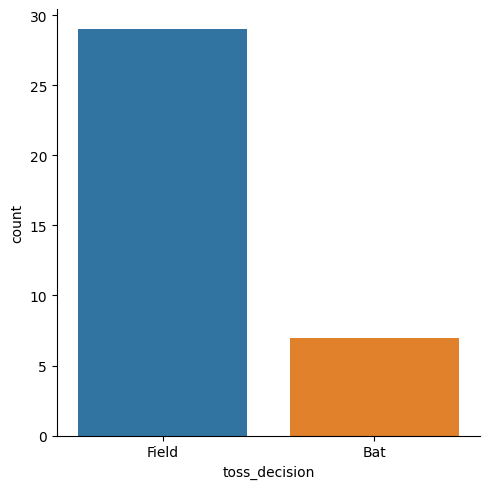

In [12]:
b=df[ (df['toss_winner']==df['match_winner'])]
c=sns.catplot(x='toss_decision',data=b,kind='count')
b['toss_decision'].value_counts()


**table topper ranking in group stage matches**

Text(0.5, 1.0, 'Number of Wins by Team in the "Group" Stage')

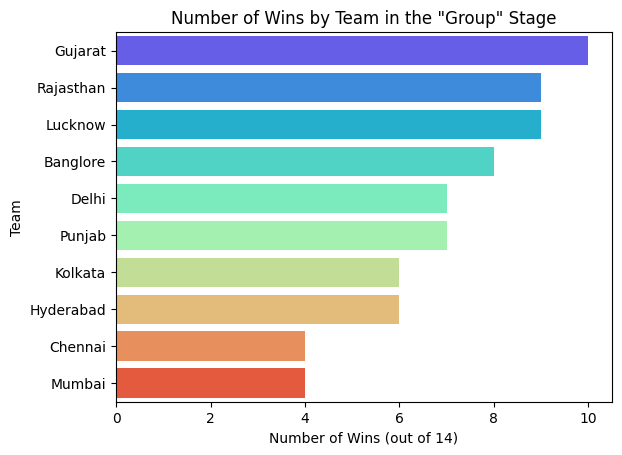

In [13]:
gr_stage_matches=df[df['stage']=='Group']
d=gr_stage_matches['match_winner'].value_counts()
sns.barplot(x=d.values, y=d.index, palette='rainbow')

plt.xlabel('Number of Wins (out of 14)')
plt.ylabel('Team')
plt.title('Number of Wins by Team in the "Group" Stage')

**In Data there is no column define , Team1 what is doing first Bat or field , its same for Team2 , add a colum team1_first & team2_first which have values Bat or Field**

In [43]:
# The np.where function is used to apply a condition to elements in an array or Series and return different values based on that condition.
# np.where takes three arguments:

# The condition to be evaluated (in this case, whether the team is batting first or second based on toss decision and winner).
# The value to be assigned if the condition is True.
# The value to be assigned if the condition is False.

# Create a new column 'batting_first_team1' with team names
df['batting_first_team'] = np.where(
    ((df['team1'] == df['toss_winner']) & (df['toss_decision'] == 'Bat')) |
    ((df['team1'] != df['toss_winner']) & (df['toss_decision'] == 'Field')),
    df['team1'],
    df['team2']
)

# Create a new column 'batting_second_team1' with team names
df['batting_second_team'] = np.where(
    ((df['team1'] == df['toss_winner']) & (df['toss_decision'] == 'Field')) |
    ((df['team1'] != df['toss_winner']) & (df['toss_decision'] == 'Bat')),
    df['team1'],
    df['team2']
)
df


,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,...,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,batting_first_team,batting_second_team
match_id,,,,,,,,,,,,,,,,,,,,,
1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,...,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,Chennai,Kolkata
2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,...,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,Mumbai,Delhi
3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,...,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,Banglore,Punjab
4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,...,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,Lucknow,Gujarat
5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,...,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,Rajasthan,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,160,...,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26,Hyderabad,Punjab
71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,191,...,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14,Rajasthan,Gujarat
72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,193,...,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43,Banglore,Lucknow


**in first inning each teams highest score**

In [46]:
groups=df.groupby(by='batting_first_team')
max_1st_inning=groups['first_ings_score'].max()
max_1st_inning

batting_first_team
Banglore     207
Chennai      216
Delhi        215
Gujarat      192
Hyderabad    195
Kolkata      177
Lucknow      210
Mumbai       177
Punjab       209
Rajasthan    222
Name: first_ings_score, dtype: int64

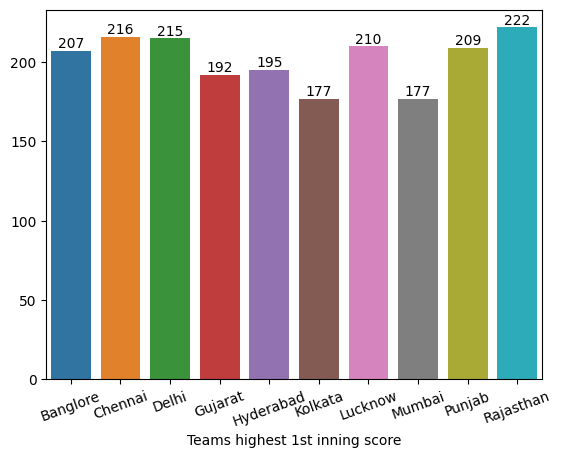

In [47]:
bars=sns.barplot(x=max_1st_inning.index,y=max_1st_inning.values)
for i in bars.containers:
    bars.bar_label(i,)
plt.xticks(rotation = 20)
plt.xlabel('Teams highest 1st inning score')
plt.show()

**Highest score of Players in Batting**

In [50]:
high_score_data=df.sort_values(by='highscore',ascending=False).head()
high_score_data

,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,...,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,batting_first_team,batting_second_team
match_id,,,,,,,,,,,,,,,,,,,,,
66,"May 18,2022","Dr DY Patil Sports Academy, Mumbai",Kolkata,Lucknow,Group,Lucknow,Bat,210,0,208,...,Lucknow,Runs,2,Quinton de Kock,Quinton de Kock,140,Mohsin Khan,3--20,Lucknow,Kolkata
34,"April 22,2022","Wankhede Stadium, Mumbai",Delhi,Rajasthan,Group,Delhi,Field,222,2,207,...,Rajasthan,Runs,15,Jos Buttler,Jos Buttler,116,Prasidh Krishna,3--22,Rajasthan,Delhi
72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,193,...,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43,Banglore,Lucknow
73,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,157,8,161,...,Rajasthan,Wickets,7,Jos Buttler,Jos Buttler,106,Prasidh Krishna,3--22,Banglore,Rajasthan
30,"April 18,2022","Brabourne Stadium, Mumbai",Kolkata,Rajasthan,Group,Kolkata,Field,217,5,210,...,Rajasthan,Runs,7,Yuzvendra Chahal,Jos Buttler,103,Yuzvendra Chahal,5--40,Rajasthan,Kolkata


**highest scorer batsman's**

<Axes: xlabel='top_scorer', ylabel='highscore'>

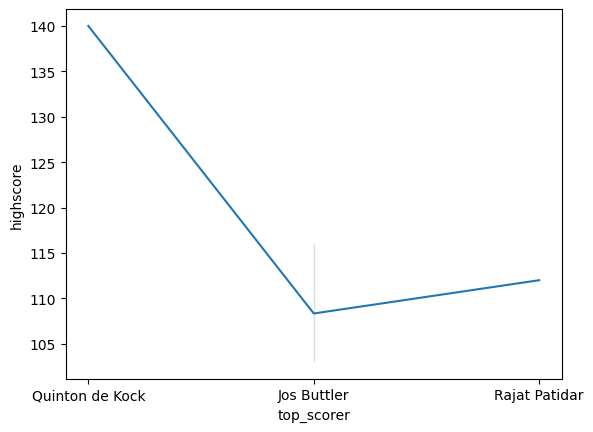

In [49]:
sns.lineplot(x=high_score_data['top_scorer'],y=high_score_data['highscore'])

**Best bowling of players**

<Axes: xlabel='best_bowling', ylabel='best_bowling_figure'>

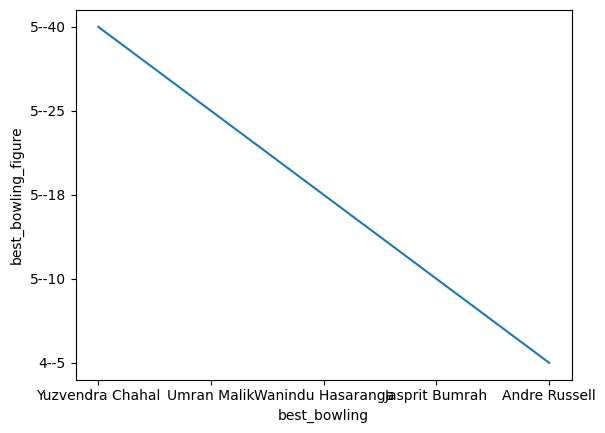

In [52]:
best_bowl=df.sort_values(by='best_bowling_figure',ascending=False).head()
best_bowl
sns.lineplot(x=best_bowl['best_bowling'],y=best_bowl['best_bowling_figure'])

**Most of times player_of_the_match winner players**

In [53]:
df['player_of_the_match'].value_counts().head(3)


Kuldeep Yadav    4
Jos Buttler      3
Umesh Yadav      2
Name: player_of_the_match, dtype: int64

**Which satdium have conducted most matches of ipl22**

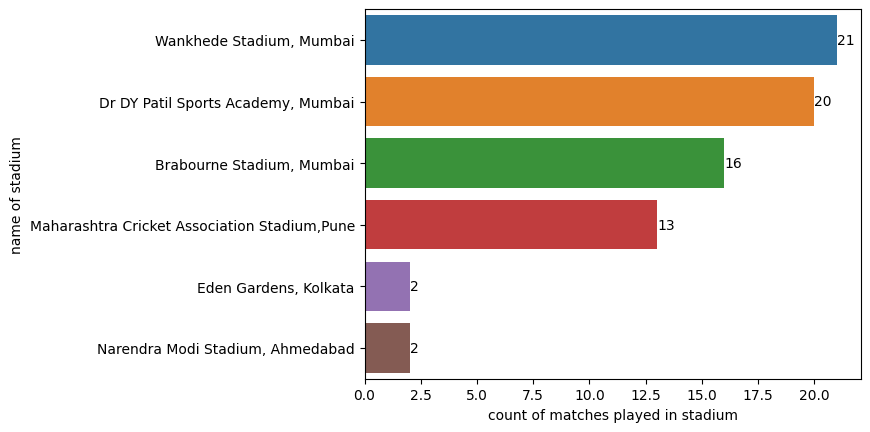

In [60]:
a=df['venue'].value_counts()
bars=sns.barplot(x=a.values, y=a.index)
plt.xlabel('count of matches played in stadium')
plt.ylabel('name of stadium')

for i in bars.containers:
  bars.bar_label(i,)

**highest and lowest scores in each stadium**

In [92]:
df['highest_score'] = df[['first_ings_score', 'second_ings_score']].max(axis=1)
df['lowest_score'] = df[['first_ings_score', 'second_ings_score']].min(axis=1)
df.loc[:,['venue','highest_score','lowest_score']]

,venue,highest_score,lowest_score
match_id,,,
1,"Wankhede Stadium, Mumbai",133,131
2,"Brabourne Stadium, Mumbai",179,177
3,"Dr DY Patil Sports Academy, Mumbai",208,205
4,"Wankhede Stadium, Mumbai",161,158
5,"Maharashtra Cricket Association Stadium,Pune",210,149
...,...,...,...
70,"Wankhede Stadium, Mumbai",160,157
71,"Eden Gardens, Kolkata",191,188
72,"Eden Gardens, Kolkata",207,193


<Axes: xlabel='venue'>

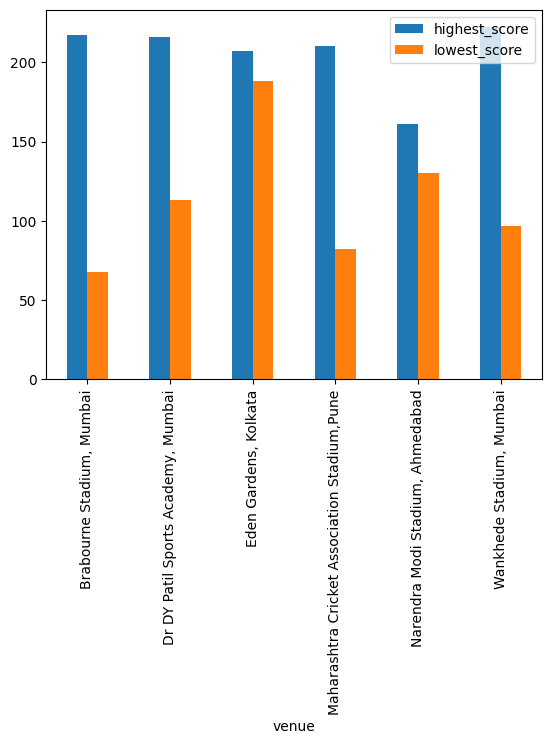

In [90]:
# Group the data by 'venue' and find the highest and lowest scores by team1 or team2
venue_scores = df.groupby('venue').agg({'highest_score': 'max', 'lowest_score': 'min'})
venue_scores
venue_scores.plot(kind='bar')